In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('fake_data.csv')

### Functions

In [3]:
# Detect Null's and Outliers

def data_quality(column):
    line_break = '-' * 25
    
    #Null's
    empty = df[column].isnull().sum()
    print(f"{line_break}\n{column}\nNumber of Null's: {empty}\n")
    
    
    
    
    if column in quantitative:
        #Outliers based on IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        IQR_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        print(f"Number of outliers according to IQR score: {IQR_outliers}")
        
        
        #Outliers based on z-score
        df_temp = df.copy()
        df_temp['zscore'] = stats.zscore(df_temp[column])
        
        #count outliers
        Zscore_outliers = df_temp['zscore'].loc[(df_temp['zscore'] >= 3) | (df_temp['zscore'] <= -3)].count()
        print(f"Number of outliers according to z score: {Zscore_outliers}")
        
        
        #visualize
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
   
        sb.boxplot(y=df[column], ax=axs[0])
        sb.histplot(df[column], kde=True, ax=axs[1]) 
    
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()
    
    return 

In [4]:
def data_summary():
    line_break = '-' * 25
    
    #Summary statistics of Categorical variables
    for col in categorical:
        counts = df[col].value_counts()
        percentages = (counts / counts.sum()) * 100
        print(f"{line_break}\n{col}\n{percentages}")
    
    
    
    #Summary statistics of Quantitative variables
    
    #create summary data frame
    cols = ['mean', 'median', '25%', '50%', '75%']
    summary_df = pd.DataFrame(columns=cols)
    for column in quantitative:

        #define statistics
        desc = df[column].describe()
        median = df[column].median()

        summary_data = pd.Series({
            'mean': desc['mean'],
            'median': median,
            '25%': desc['25%'],
            '50%': desc['50%'],
            '75%': desc['75%']
        }, name=column)

        
        # Append the summary statistics of the current variable to the summary_df DataFrame
        summary_df = pd.concat([summary_df, summary_data.to_frame().T])
    
    return summary_df

In [5]:
# univariate visualization
def uni_vis(columns, title):
    
  
    count = len(columns)
    rows = int(count / 3) + (1 if count % 3 else 0)
    
    fig, axs = plt.subplots(rows, 3, figsize=(15,15))
    axs = axs.flatten()
    
    # Loop over the columns and create the plots
    for i, column in enumerate(columns):
            axs[i].hist(df[column])
            axs[i].set_title(column)
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(title, verticalalignment='top')
    plt.show()
    

    
#bivariate visualization
def bi_vis(df, y_col, x_cols, title):
    count = len(x_cols)
    rows = int(count / 3) + (1 if count % 3 else 0)
    
    fig, axs = plt.subplots(rows, 3, figsize=(15, rows * 5))  
    axs = axs.flatten()
    
    
    # Loop over the columns and create the point plots
    for i, column in enumerate(x_cols):
        if column in categorical:
            sb.pointplot(data=df, x=column, y=y_col, ax=axs[i])
            axs[i].set_title(column)  
            axs[i].set_xlabel(column)  
            axs[i].set_ylabel('Total Charge')
        else:
            sb.scatterplot(data=df, x=column, y=y_col, ax=axs[i])
            axs[i].set_title(column)  
            axs[i].set_xlabel(column)  
            axs[i].set_ylabel('Total Charge')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(title, verticalalignment='top')
    plt.show()

In [8]:
# get a summary of characteristics of residuals

def residual_eval(model):
    #get residuals
    residuals = model.resid
    
    #calculate Residual Standard Error (RSE)
    RSE = np.sqrt((residuals**2).sum() / 9968)
    print(f'Residual Standard Error:{RSE}\n')
    
    #other metrics
    adjr2 = model.rsquared_adj
    AIC = model.aic
    print(f'Adjusted R-square:{adjr2}\nAIC:{AIC}')
    
    #Homoscedacity
    y_hat = model.predict()
    
    #Visualize
    sm.qqplot(residuals, line = '45', fit = True)
    plt.title('Residual test of normality')
    plt.show();
    
    plt.hist(residuals)
    plt.title('Residual test of normality')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show();
    
    
    
   

### Variables 

In [9]:
target = ['CWPM']

predictors = [
              'Check-in_AM', 'Respectful_AM', 'Responsible_AM', 'Safe_AM',
               'Check-in_PM', 'Respectful_PM', 'Responsible_PM', 
                'Safe_PM'
             ]

all_variables = [
                 'Check-in_AM', 'Respectful_AM', 'Responsible_AM', 'Safe_AM',
               'Check-in_PM', 'Respectful_PM', 'Responsible_PM', 
                'Safe_PM', 'CWPM'
                ]

categorical = [
              'Check-in_AM', 'Check-in_PM'
             ]

one_hots = [
            'Check-in_AM', 'Check-in_PM'
            ]

quantitative = [ 'Respectful_AM', 'Responsible_AM', 'Safe_AM',
                'Respectful_PM', 'Responsible_PM', 
                'Safe_PM', 'CWPM']


### Cleaning

In [10]:
df.columns

Index(['Check-in_AM', 'Respectful_AM', 'Responsible_AM', 'Safe_AM',
       'Check-in_PM', 'Respectful_PM', 'Responsible_PM', 'Safe_PM', 'CWPM'],
      dtype='object')

-------------------------
Check-in_AM
Number of Null's: 0

-------------------------
Respectful_AM
Number of Null's: 0

Number of outliers according to IQR score: 0
Number of outliers according to z score: 0


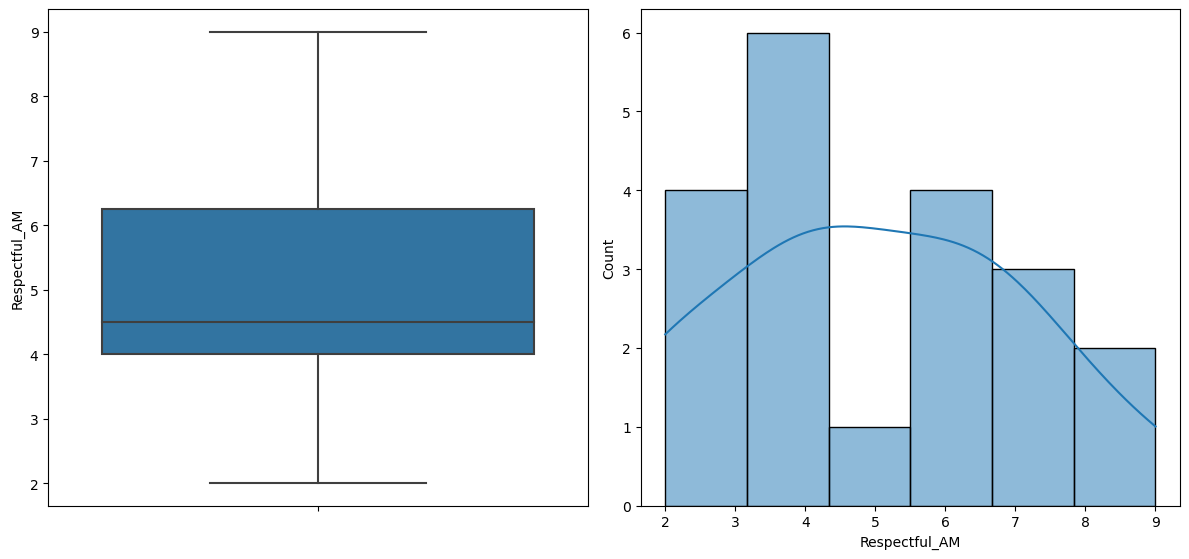

-------------------------
Responsible_AM
Number of Null's: 0

Number of outliers according to IQR score: 3
Number of outliers according to z score: 0


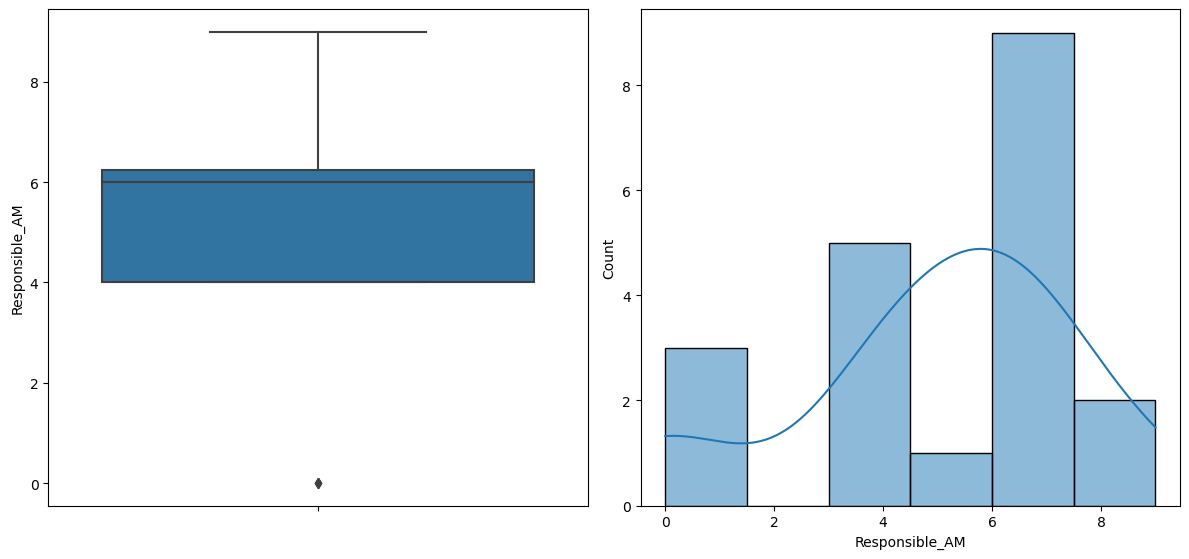

-------------------------
Safe_AM
Number of Null's: 0

Number of outliers according to IQR score: 4
Number of outliers according to z score: 0


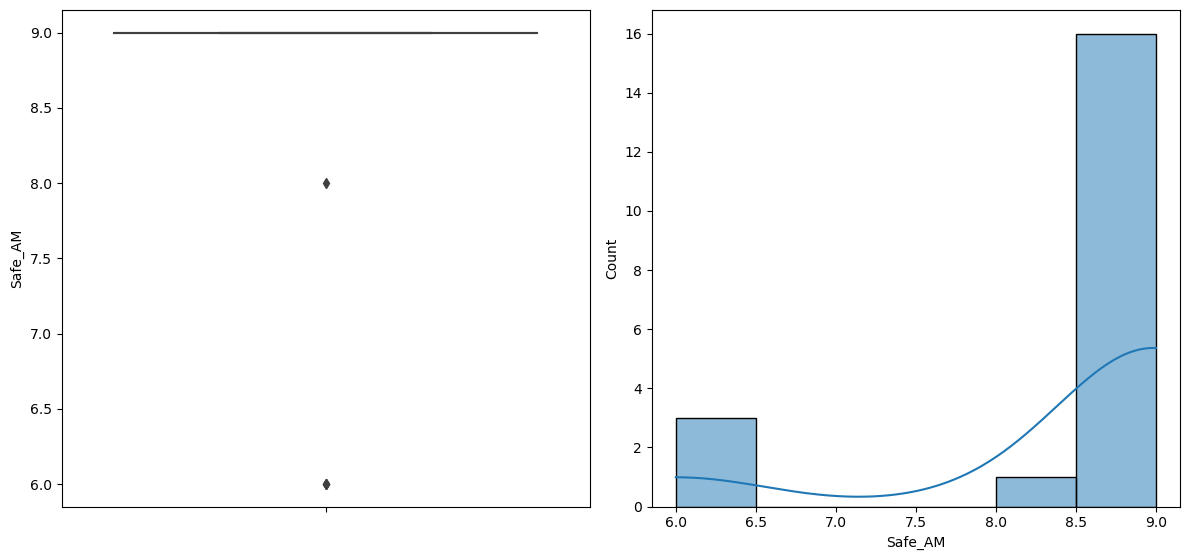

-------------------------
Check-in_PM
Number of Null's: 0

-------------------------
Respectful_PM
Number of Null's: 0

Number of outliers according to IQR score: 0
Number of outliers according to z score: 0


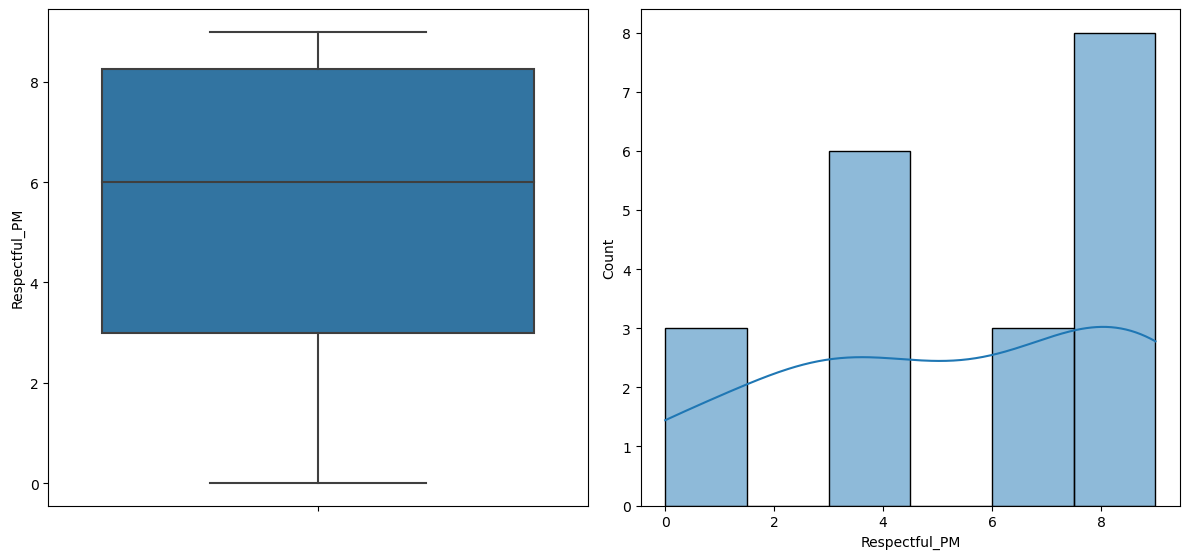

-------------------------
Responsible_PM
Number of Null's: 0

Number of outliers according to IQR score: 0
Number of outliers according to z score: 0


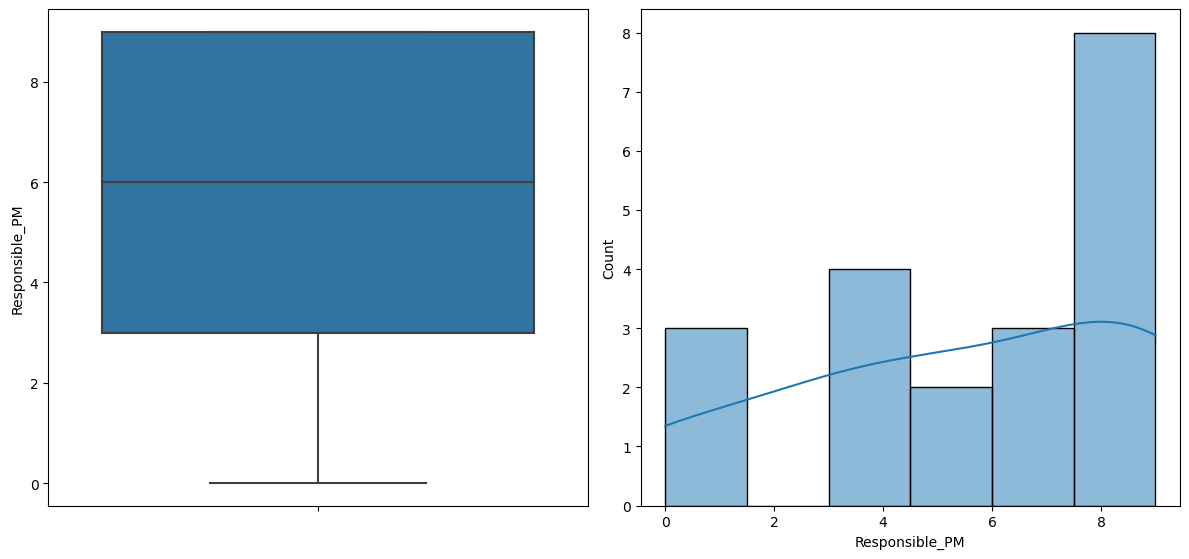

-------------------------
Safe_PM
Number of Null's: 0

Number of outliers according to IQR score: 1
Number of outliers according to z score: 1


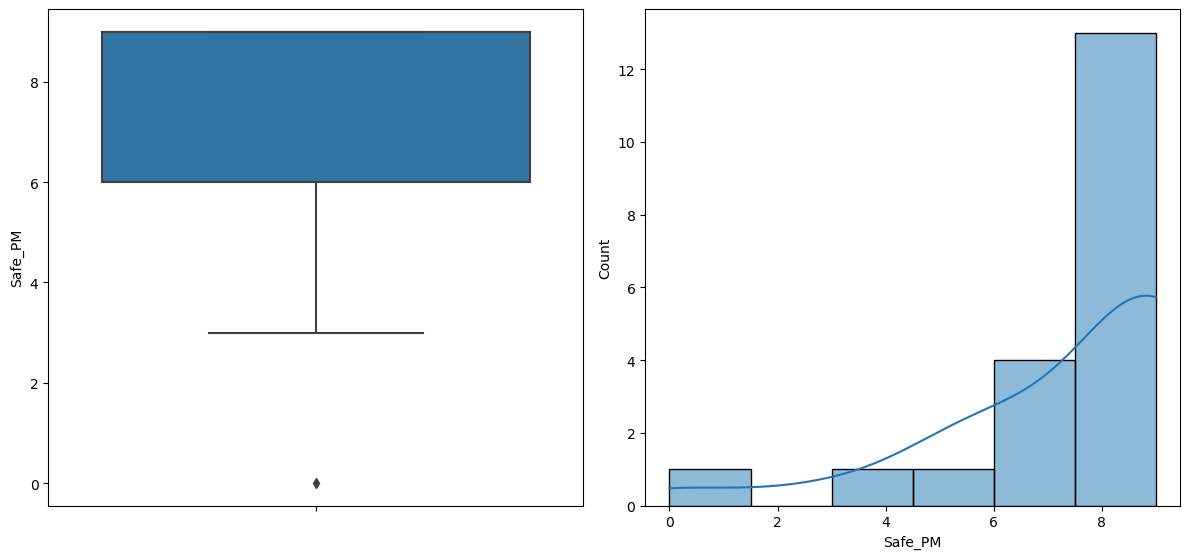

-------------------------
CWPM
Number of Null's: 0

Number of outliers according to IQR score: 0
Number of outliers according to z score: 0


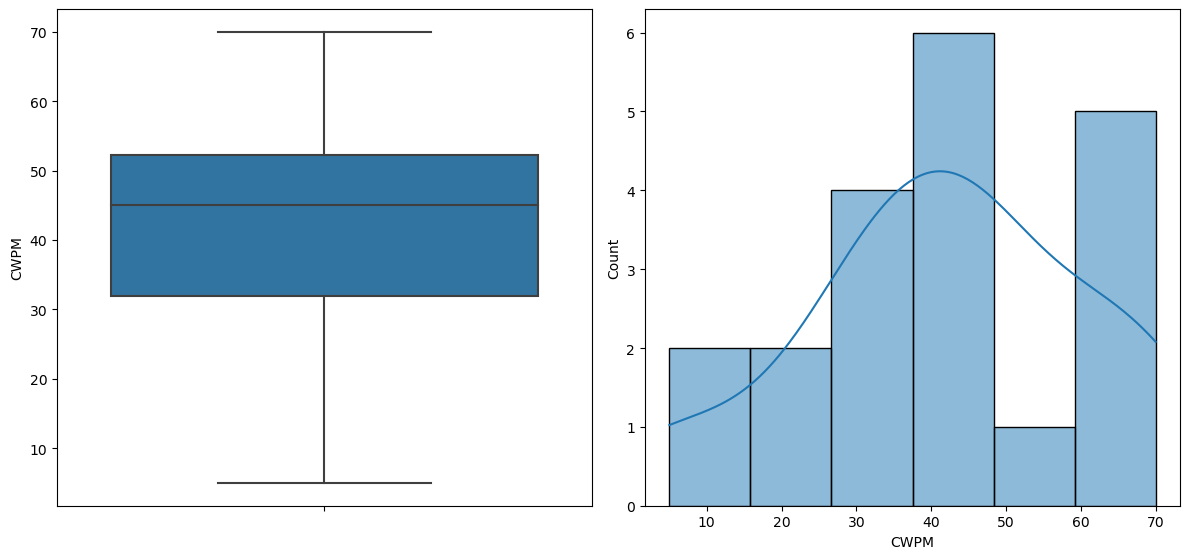

In [11]:
#assess cleaning needs
for col in all_variables:
    data_quality(col)

### Treatment

### Explore Summary statistics

In [12]:
data_summary()

-------------------------
Check-in_AM
Yellow    40.0
Green     25.0
Blue      25.0
Red       10.0
Name: Check-in_AM, dtype: float64
-------------------------
Check-in_PM
Green     35.0
Blue      30.0
Yellow    20.0
Red       15.0
Name: Check-in_PM, dtype: float64


,mean,median,25%,50%,75%
Respectful_AM,4.95,4.5,4.0,4.5,6.25
Responsible_AM,4.95,6.0,4.0,6.0,6.25
Safe_AM,8.50,9.0,9.0,9.0,9.00
Respectful_PM,5.30,6.0,3.0,6.0,8.25
Responsible_PM,5.50,6.0,3.0,6.0,9.00
Safe_PM,7.40,9.0,6.0,9.0,9.00
CWPM,42.05,45.0,32.0,45.0,52.25


### Visualize 

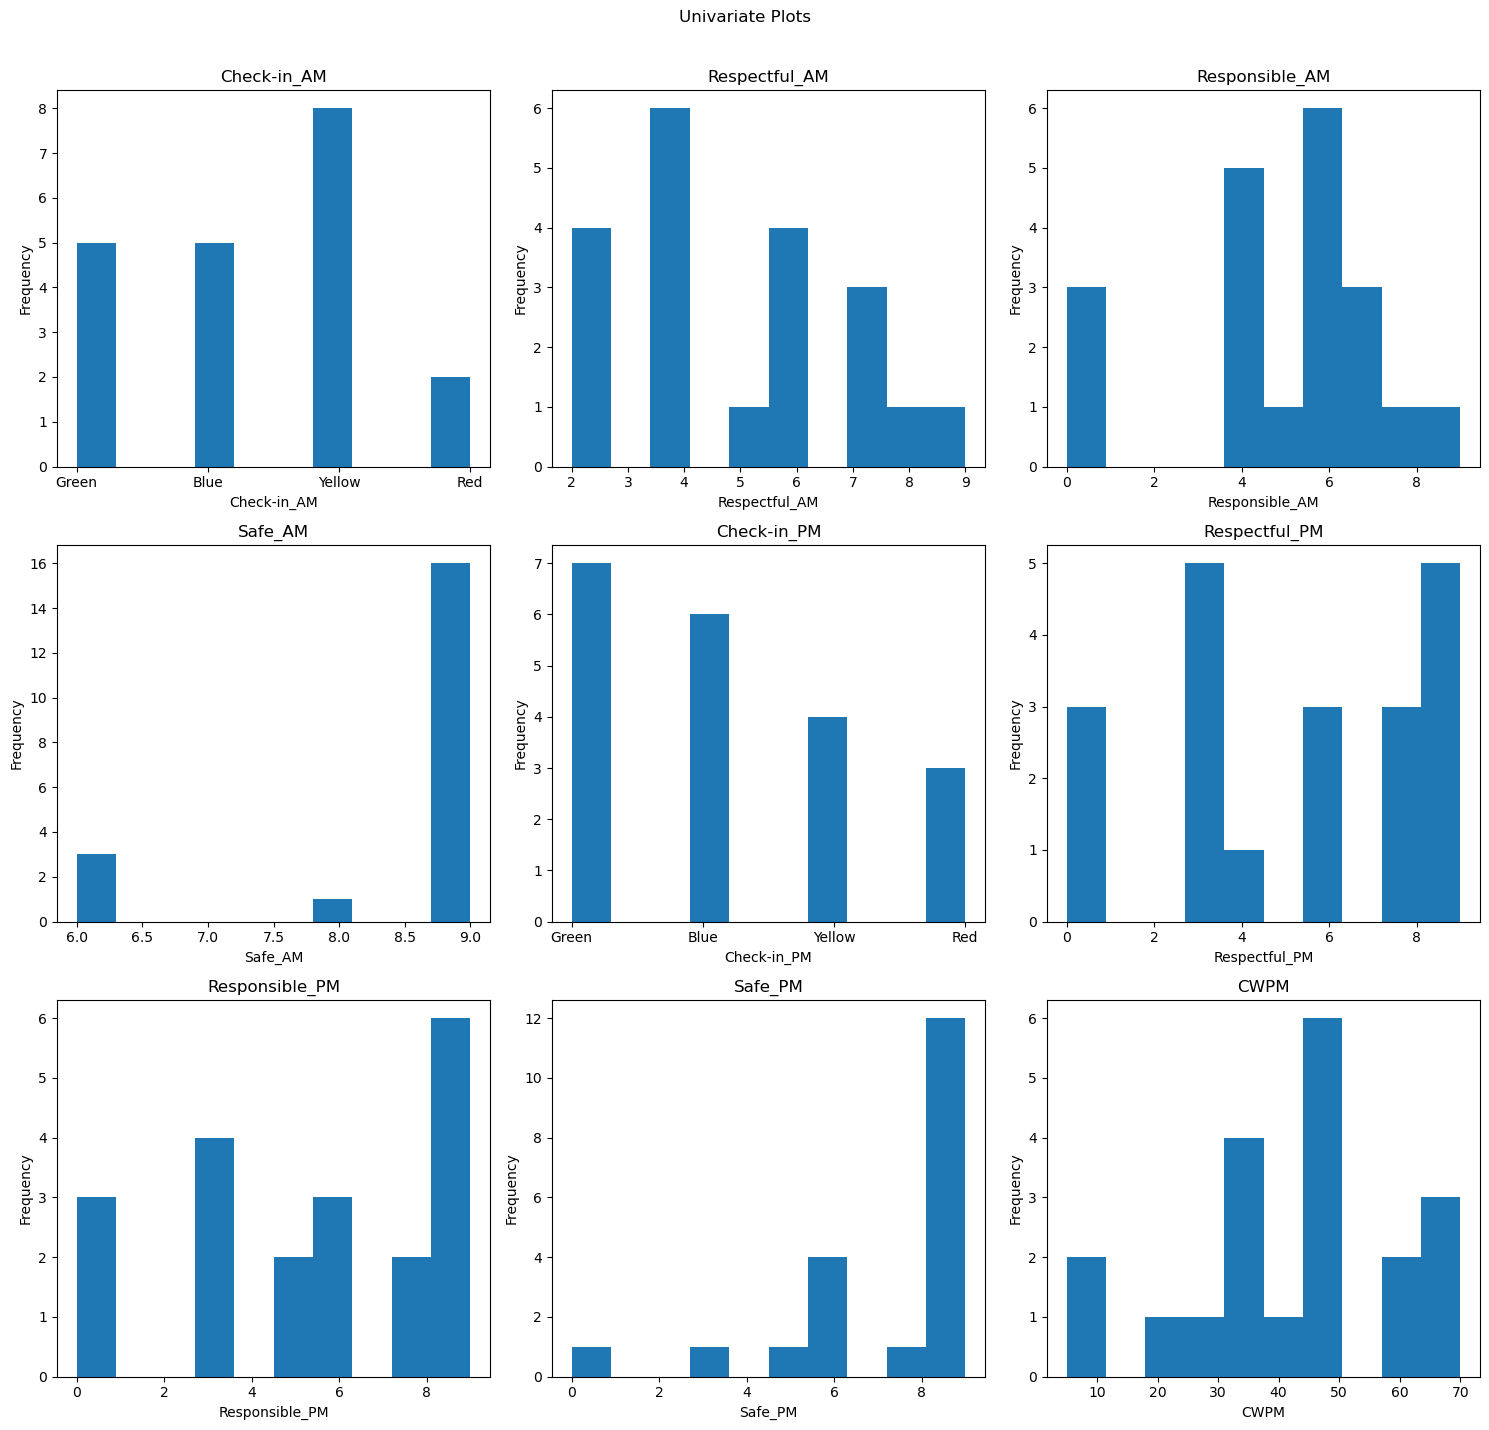

In [13]:
#visualize univariate plots
uni_vis(all_variables, 'Univariate Plots')

### Transformation

In [14]:
#one hot encoding
df_clean = pd.get_dummies(df, columns = one_hots, drop_first=True)
df_clean

,Respectful_AM,Responsible_AM,Safe_AM,Respectful_PM,Responsible_PM,Safe_PM,CWPM,Check-in_AM_Green,Check-in_AM_Red,Check-in_AM_Yellow,Check-in_PM_Green,Check-in_PM_Red,Check-in_PM_Yellow
0,9,9,9,9,9,9,45,1,0,0,1,0,0
1,7,7,9,9,9,9,63,1,0,0,1,0,0
2,4,6,9,9,9,9,38,0,0,0,1,0,0
3,2,4,9,3,3,5,26,0,0,0,0,0,0
4,4,4,9,3,3,9,68,0,0,1,0,0,1
5,6,7,6,3,3,6,23,0,1,0,0,1,0
6,2,0,9,0,0,0,5,0,1,0,0,1,0
7,5,5,6,0,0,3,5,0,0,1,0,1,0
8,4,6,9,6,6,9,47,0,0,1,0,0,0
9,7,8,9,3,3,6,45,1,0,0,0,0,1


In [15]:
df.columns

Index(['Check-in_AM', 'Respectful_AM', 'Responsible_AM', 'Safe_AM',
       'Check-in_PM', 'Respectful_PM', 'Responsible_PM', 'Safe_PM', 'CWPM'],
      dtype='object')

In [16]:
df_clean.columns

Index(['Respectful_AM', 'Responsible_AM', 'Safe_AM', 'Respectful_PM',
       'Responsible_PM', 'Safe_PM', 'CWPM', 'Check-in_AM_Green',
       'Check-in_AM_Red', 'Check-in_AM_Yellow', 'Check-in_PM_Green',
       'Check-in_PM_Red', 'Check-in_PM_Yellow'],
      dtype='object')

In [17]:
dummies = ['Check-in_AM_Green',
       'Check-in_AM_Red', 'Check-in_AM_Yellow', 'Check-in_PM_Green',
       'Check-in_PM_Red', 'Check-in_PM_Yellow']

to_remove = ['Check-in_AM', 'Check-in_PM']

for variable in dummies:
    predictors.append(variable)

for variable in to_remove:
    predictors.remove(variable)

    

print(predictors)

['Respectful_AM', 'Responsible_AM', 'Safe_AM', 'Respectful_PM', 'Responsible_PM', 'Safe_PM', 'Check-in_AM_Green', 'Check-in_AM_Red', 'Check-in_AM_Yellow', 'Check-in_PM_Green', 'Check-in_PM_Red', 'Check-in_PM_Yellow']


### Initial Model

In [26]:
X = df_clean[predictors]
X = sm.add_constant(X)
Y = df_clean[target]

model = sm.OLS(Y, X)
result = model.fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CWPM   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     6.719
Date:                Sun, 07 Apr 2024   Prob (F-statistic):            0.00896
Time:                        12:33:39   Log-Likelihood:                -61.342
No. Observations:                  20   AIC:                             148.7
Df Residuals:                       7   BIC:                             161.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0048     45.075      0.111      0.915    -101.581     111.590
Respectful_AM         -1.6997      2.791     -0.609      0.562      -8.300       4.900
Responsible_AM         0.4282      1.575      0.272      0.794      -3.295       4.151
Safe_AM                0.6151      4.065      0.151      0.884      -8.997      10.228
Respectful_PM          0.9223      4.767      0.193      0.852     -10.350      12.195
Responsible_PM        -0.1013      4.855     -0.021      0.984     -11.582      11.379
Safe_PM                1.8307      2.337      0.783      0.459      -3.695       7.357
Check-in_AM_Green     11.4913     10.390      1.106      0.305     -13.077      36.059
Check-in_AM_Red       27.9051     13.598      2.052      0.079      -4.249      60.059
Check-in_AM_Yellow    22.1167      7.637      2.896      0.023       4.057      40.176
Check-in_PM_Green     12.7957      7.594      1.685      0.136      -5.161      30.753
Check-in_PM_Red      -24.9460     18.015     -1.385      0.209     -67.545      17.653
Check-in_PM_Yellow    24.9337      8.627      2.890      0.023       4.533      45.334
==============================================================================
Omnibus:                        2.313   Durbin-Watson:                   2.656
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.569
Skew:                           0.681   Prob(JB):                        0.456
Kurtosis:                       2.836   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Reduce Model

In [37]:
#reduce manually based on t-stat, p-values, and potential multicollinearity
manual_reduce = [ 
       'Check-in_PM_Yellow', 'Check-in_PM_Green',
        'Check-in_AM_Yellow', 'Safe_PM', 'Respectful_AM'
       ]
X = df_clean[manual_reduce]
#X = sm.add_constant(X)
        
manual_red_model = sm.OLS(Y, X)
manual_red_result = manual_red_model.fit()
manual_red_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   CWPM   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              108.4
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                    3.16e-11
Time:                        12:41:56   Log-Likelihood:                         -68.759
No. Observations:                  20   AIC:                                      147.5
Df Residuals:                      15   BIC:                                      152.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Check-in_PM_Yellow    30.5856      5.464      5.598      0.000      18.940      42.231
Check-in_PM_Green     12.9302      5.378      2.404      0.030       1.466      24.394
Check-in_AM_Yellow     9.9375      4.613      2.154      0.048       0.104      19.771
Safe_PM                3.9126      0.709      5.522      0.000       2.402       5.423
Respectful_AM         -0.3236      0.927     -0.349      0.732      -2.300       1.653
==============================================================================
Omnibus:                        0.161   Durbin-Watson:                   2.703
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.034
Skew:                          -0.049   Prob(JB):                        0.983
Kurtosis:                       2.825   Cond. No.                         29.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#check for Multicolinearity
X = df_clean[['Check-in_PM_Yellow', 'Check-in_PM_Green',
        'Check-in_AM_Yellow', 'Safe_PM']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.495203,Check-in_PM_Yellow
1,2.621424,Check-in_PM_Green
2,2.239277,Check-in_AM_Yellow
3,4.099763,Safe_PM


### Residual Evaluation

In [39]:
#Residual Standard Error

$$ RSE = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - p - 1}} $$

Residual Standard Error:0.23281184793100002

Adjusted R-square:0.783160913141995
AIC:148.684613827833


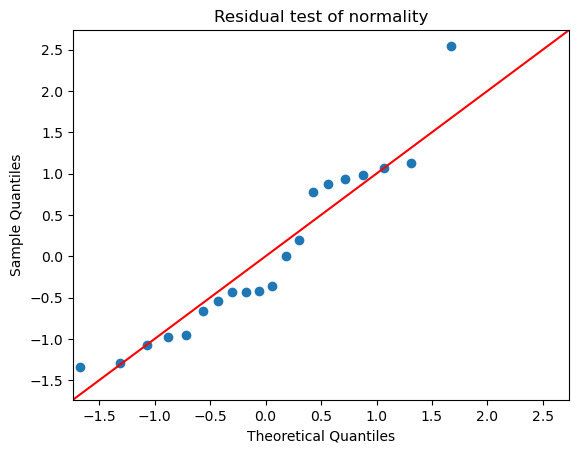

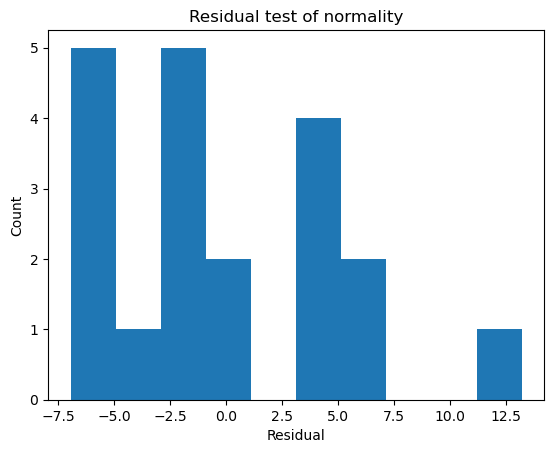

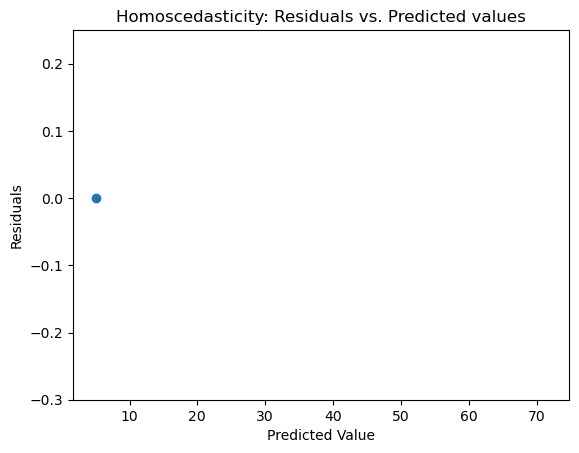

In [41]:
#orginal full model
residual_eval(result)

#Reduced based on a stepwise function of eliminating variables based on max p-values until all p-values are less than .05
residual_eval(reduced_model)